# Hypothesis 21, 23 & 24

In [1]:
from pyspark.sql import SparkSession, functions as F, types as T
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
spark = SparkSession.builder.getOrCreate()

In [3]:
orders_df = spark.read \
                      .option('quote', '\"') \
                      .option('escape', '\"') \
                      .csv('./dataset/olist_orders_dataset.csv', header=True, multiLine=True, inferSchema=True)

order_items_df = spark.read \
                      .option('quote', '\"') \
                      .option('escape', '\"') \
                      .csv('./dataset/olist_order_items_dataset.csv', header=True, multiLine=True, inferSchema=True)

orders_df.printSchema()

order_items_df.printSchema()

root
 |-- order_id: string (nullable = true)
 |-- customer_id: string (nullable = true)
 |-- order_status: string (nullable = true)
 |-- order_purchase_timestamp: timestamp (nullable = true)
 |-- order_approved_at: timestamp (nullable = true)
 |-- order_delivered_carrier_date: timestamp (nullable = true)
 |-- order_delivered_customer_date: timestamp (nullable = true)
 |-- order_estimated_delivery_date: timestamp (nullable = true)

root
 |-- order_id: string (nullable = true)
 |-- order_item_id: integer (nullable = true)
 |-- product_id: string (nullable = true)
 |-- seller_id: string (nullable = true)
 |-- shipping_limit_date: timestamp (nullable = true)
 |-- price: double (nullable = true)
 |-- freight_value: double (nullable = true)



In [4]:
order_items_df.columns

['order_id',
 'order_item_id',
 'product_id',
 'seller_id',
 'shipping_limit_date',
 'price',
 'freight_value']

In [5]:
new_df = orders_df.join(order_items_df.groupBy('order_id')
                        .agg(F.sum('freight_value')
                             .alias('total_freight')), 
                        how='left', 
                        on='order_id')

In [6]:
new_df.limit(5).toPandas()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,total_freight
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,8.72
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,22.76
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,19.22
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,27.20
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,8.72


In [7]:
new_df = new_df.join(order_items_df.groupBy('order_id')
                     .agg(F.sum('price')
                          .alias('total_price')), 
                     how='left', 
                     on='order_id')

new_df.limit(5).toPandas()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,total_freight,total_price
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,8.72,29.99
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,22.76,118.70
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,19.22,159.90
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,27.20,45.00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,8.72,19.90


In [9]:
new_df = new_df.join(order_items_df.groupBy('order_id')
                     .agg(F.max('order_item_id')
                          .alias('total_items')),
                     how='left', 
                     on='order_id')

new_df = new_df.filter(F.col('total_price').isNotNull()) \
               .filter(F.col('total_freight').isNotNull())

In [10]:
new_df.limit(10).toPandas()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,total_freight,total_price,total_items
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,8.72,29.99,1
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,22.76,118.70,1
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,19.22,159.90,1
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,27.20,45.00,1
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,8.72,19.90,1
5,a4591c265e18cb1dcee52889e2d8acc3,503740e9ca751ccdda7ba28e9ab8f608,delivered,2017-07-09 21:57:05,2017-07-09 22:10:13,2017-07-11 14:58:04,2017-07-26 10:57:55,2017-08-01,27.36,147.90,1
6,136cce7faa42fdb2cefd53fdc79a6098,ed0271e0b7da060a393796590e7b737a,invoiced,2017-04-11 12:22:08,2017-04-13 13:25:17,NaT,NaT,2017-05-09,16.05,49.90,1
7,6514b8ad8028c9f2cc2374ded245783f,9bdf08b4b3b52b5526ff42d37d47f222,delivered,2017-05-16 13:10:30,2017-05-16 13:22:11,2017-05-22 10:07:46,2017-05-26 12:55:51,2017-06-07,15.17,59.99,1
8,76c6e866289321a7c93b82b54852dc33,f54a9f0e6b351c431402b8461ea51999,delivered,2017-01-23 18:29:09,2017-01-25 02:50:47,2017-01-26 14:16:31,2017-02-02 14:08:10,2017-03-06,16.05,19.90,1
9,e69bfb5eb88e0ed6a785585b27e16dbf,31ad1d1b63eb9962463f764d4e6e0c9d,delivered,2017-07-29 11:55:02,2017-07-29 12:05:32,2017-08-10 19:45:24,2017-08-16 17:14:30,2017-08-23,19.77,149.99,1


In [11]:
new_df.filter(F.col('order_id') == '1b15974a0141d54e36626dca3fdc731a').toPandas()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,total_freight,total_price,total_items
0,1b15974a0141d54e36626dca3fdc731a,be1b70680b9f9694d8c70f41fa3dc92b,delivered,2018-02-22 15:30:41,2018-02-24 03:20:27,2018-03-02 00:18:01,2018-03-05 15:22:27,2018-03-08,202.4,2000.0,20


## Hypothesis 21: The order's itens quantity is directly proportional to the full order value (price + freight)

In [12]:
aux_df = new_df.select(F.col('total_items').alias('itens_qnty').cast(T.IntegerType()),
                       F.col('total_price'),
                       F.col('total_freight'))
aux_df.limit(10).show()

+----------+-----------+-------------+
|itens_qnty|total_price|total_freight|
+----------+-----------+-------------+
|         2|      49.23|         29.2|
|         1|      159.9|         28.5|
|         1|      34.99|         15.1|
|         1|     151.99|        17.77|
|         1|      49.99|        11.73|
|         1|       55.0|        14.14|
|         1|       46.9|         8.88|
|         1|       59.9|        14.73|
|         2|      55.98|        45.34|
|         1|       55.0|        24.52|
+----------+-----------+-------------+



In [13]:
aux_df.filter(F.col('order_id') == '1b15974a0141d54e36626dca3fdc731a').show()

+----------+-----------+------------------+
|itens_qnty|total_price|     total_freight|
+----------+-----------+------------------+
|        20|     2000.0|202.40000000000003|
+----------+-----------+------------------+



In [14]:
myUdf = F.udf(lambda x,y: float(x)+float(y), T.DoubleType())

aux_df = aux_df.withColumn('order_price', F.round(myUdf('total_price', 'total_freight'), 2))

In [15]:
aux_df.limit(10).show()

+----------+-----------+-------------+-----------+
|itens_qnty|total_price|total_freight|order_price|
+----------+-----------+-------------+-----------+
|         2|      49.23|         29.2|      78.43|
|         1|      159.9|         28.5|      188.4|
|         1|      34.99|         15.1|      50.09|
|         1|     151.99|        17.77|     169.76|
|         1|      49.99|        11.73|      61.72|
|         1|       55.0|        14.14|      69.14|
|         1|       46.9|         8.88|      55.78|
|         1|       59.9|        14.73|      74.63|
|         2|      55.98|        45.34|     101.32|
|         1|       55.0|        24.52|      79.52|
+----------+-----------+-------------+-----------+



In [16]:
aux_df.stat.corr('itens_qnty', 'order_price')

0.18915458937976526

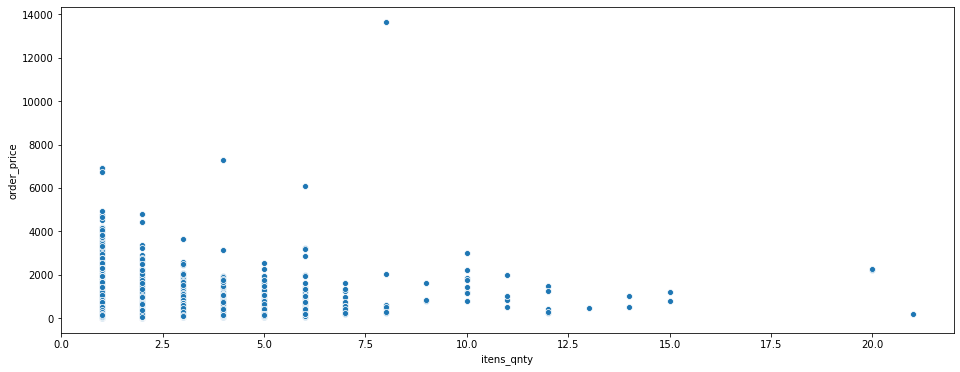

In [17]:
plt.figure(figsize=(16, 6))
sns.scatterplot(x='itens_qnty', y='order_price', data=aux_df.toPandas())

## Conclusion H21

The hypothesis 21 is **invalid**, as the full price of the order has no direct correlation with the order itens quantity

## Hypothesis 23: The freight value is directly proportional to the order's time of delivery

In [18]:
aux_df = new_df.filter(F.col('order_delivered_customer_date').isNotNull())

aux_df = new_df.select(F.col('total_freight'),
                       F.col('order_purchase_timestamp').alias('purchase'),
                       F.col('order_delivered_customer_date').alias('deliver'))

aux_df = aux_df.withColumn('order_duration', F.datediff(F.col('deliver'), F.col('purchase')))
aux_df = aux_df.filter(F.col('order_duration').isNotNull())
aux_df = aux_df.drop('purchase', 'deliver')

aux_df.show()

+-------------+--------------+
|total_freight|order_duration|
+-------------+--------------+
|         8.72|             8|
|        22.76|            14|
|        19.22|             9|
|         27.2|            14|
|         8.72|             3|
|        27.36|            17|
|        15.17|            10|
|        16.05|            10|
|        19.77|            18|
|        61.06|            13|
|        16.13|             6|
|        18.23|            12|
|         12.8|             5|
|        16.11|            11|
|        14.05|            14|
|        77.45|            18|
|         15.1|            13|
|        11.85|             6|
|        16.97|            13|
|         8.96|            21|
+-------------+--------------+
only showing top 20 rows



In [19]:
aux_df.stat.corr('total_freight', 'order_duration')

0.1672181301805252

## Conclusion H23

The hypothesis 23 is **invalid**, as there is nearly no correlation between the freight value and the time of delivery

## Hypothesis 24: The freight value is directly proportional to the order's items quantity

In [20]:
aux_df = new_df.select(F.col('total_items'),
                       F.col('total_freight'))

aux_df.show()

+-----------+-------------+
|total_items|total_freight|
+-----------+-------------+
|          2|         29.2|
|          1|         28.5|
|          1|         15.1|
|          1|        17.77|
|          1|        11.73|
|          1|        14.14|
|          1|         8.88|
|          1|        14.73|
|          2|        45.34|
|          1|        24.52|
|          1|        11.37|
|          1|        57.33|
|          1|        15.15|
|          2|        37.38|
|          1|        33.87|
|          1|        21.51|
|          1|         28.0|
|          1|        14.98|
|          1|       104.73|
|          1|        14.09|
+-----------+-------------+
only showing top 20 rows



In [21]:
aux_df.stat.corr('total_items', 'total_freight')

0.4369409500727236

## Conclusion H24

The hypothesis 24 is **valid**, as there is a considerable relation between the freight value and the order's items quantity